Este dataset chamado "possum(gambá)" contém nove medidas morfométricas para 104 gambás da montanha. Esses gambás foram capturados em sete locais diferentes, do sul de Victoria ao centro de Queensland. Nele iremos utilizar de Regressao Linear, Regressao Logistica e Random Forest para tentar predizer qual o tamanho da cabeca de um determinado gambá.

Existem 14 variáveis ​​​​no conjunto de dados:
* Caso (número do gambá, ID exclusivo)
* Local da gravação
* Área populacional
* Sexo
* Idade
* Comprimento da cabeça
* Largura do crânio
* Comprimento total
* Comprimento da cauda
* Comprimento do pé
* Comprimento da concha da orelha
* Tamanho dos olhos
* Peito
* Barriga

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

df = pd.read_csv('possum.csv', index_col=0)
df.head()

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
case,,,,,,,,,,,,,
1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [3]:
df.shape

(104, 13)

In [4]:
df.describe()

,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, 1 to 104
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   site      104 non-null    int64  
 1   Pop       104 non-null    object 
 2   sex       104 non-null    object 
 3   age       102 non-null    float64
 4   hdlngth   104 non-null    float64
 5   skullw    104 non-null    float64
 6   totlngth  104 non-null    float64
 7   taill     104 non-null    float64
 8   footlgth  103 non-null    float64
 9   earconch  104 non-null    float64
 10  eye       104 non-null    float64
 11  chest     104 non-null    float64
 12  belly     104 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 11.4+ KB


Vamos dividir as colunas em 2 tipos:
* Categóricas
* Numéricas

In [6]:
categorical_columns=df.select_dtypes(include="object").columns
numerical_columns=df.select_dtypes(exclude="object").columns

In [7]:
df.isnull().sum()

,0
site,0
Pop,0
sex,0
age,2
hdlngth,0
skullw,0
totlngth,0
taill,0
footlgth,1
earconch,0


> O dataset possui 2 valores null na idade e 1 no footlgth

In [8]:
df.dropna(axis=0,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, 1 to 104
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   site      101 non-null    int64  
 1   Pop       101 non-null    object 
 2   sex       101 non-null    object 
 3   age       101 non-null    float64
 4   hdlngth   101 non-null    float64
 5   skullw    101 non-null    float64
 6   totlngth  101 non-null    float64
 7   taill     101 non-null    float64
 8   footlgth  101 non-null    float64
 9   earconch  101 non-null    float64
 10  eye       101 non-null    float64
 11  chest     101 non-null    float64
 12  belly     101 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 11.0+ KB


# Agora começaremos a análise exploratória de dados

In [9]:
dataframe=df.drop(["Pop","sex"],axis=1)
dataframe.corr().style.background_gradient(cmap='coolwarm')

,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
site,1.000000,-0.127688,-0.195820,-0.103363,-0.304642,0.372065,-0.781489,-0.818580,-0.040443,-0.380269,-0.195044
age,-0.127688,1.000000,0.329505,0.285563,0.268297,0.120205,0.126190,0.066234,0.231857,0.335030,0.360816
hdlngth,-0.195820,0.329505,1.000000,0.705901,0.670402,0.275155,0.415945,0.131576,0.354688,0.621068,0.545438
skullw,-0.103363,0.285563,0.705901,1.000000,0.506382,0.241027,0.297197,0.025293,0.314319,0.613842,0.444216
totlngth,-0.304642,0.268297,0.670402,0.506382,1.000000,0.563586,0.483174,0.181230,0.247150,0.556094,0.500558
taill,0.372065,0.120205,0.275155,0.241027,0.563586,1.000000,-0.114560,-0.387871,0.192341,0.152924,0.296206
footlgth,-0.781489,0.126190,0.415945,0.297197,0.483174,-0.114560,1.000000,0.782415,0.013869,0.486477,0.311970
earconch,-0.818580,0.066234,0.131576,0.025293,0.181230,-0.387871,0.782415,1.000000,-0.143869,0.241359,0.071309
eye,-0.040443,0.231857,0.354688,0.314319,0.247150,0.192341,0.013869,-0.143869,1.000000,0.134730,0.242902
chest,-0.380269,0.335030,0.621068,0.613842,0.556094,0.152924,0.486477,0.241359,0.134730,1.000000,0.609757


# Vamos ver a distribuição das colunas numéricas

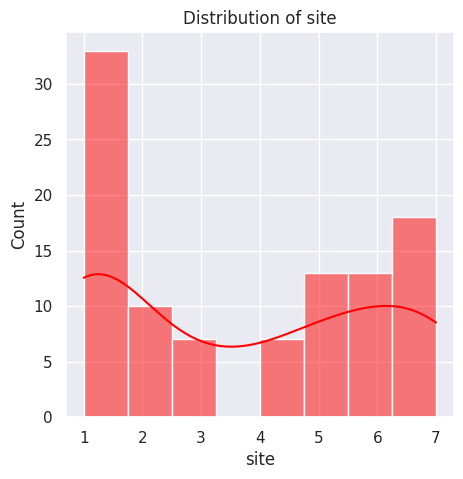

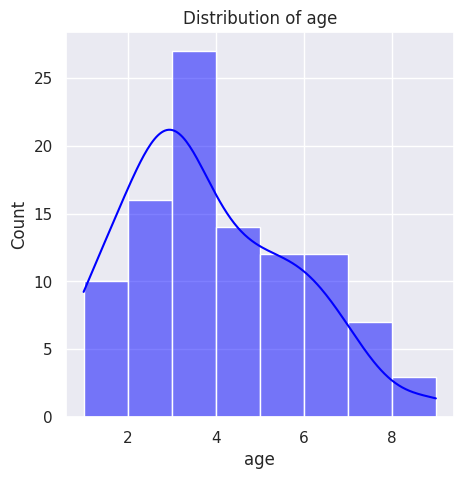

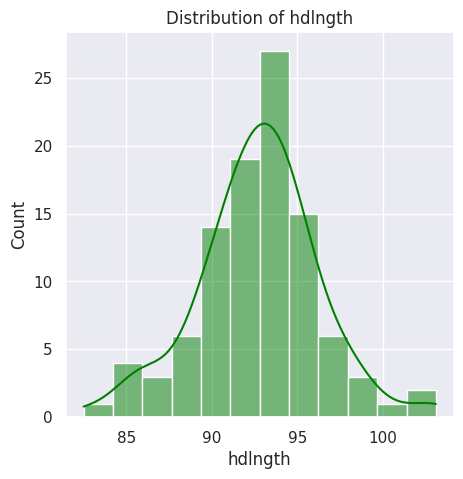

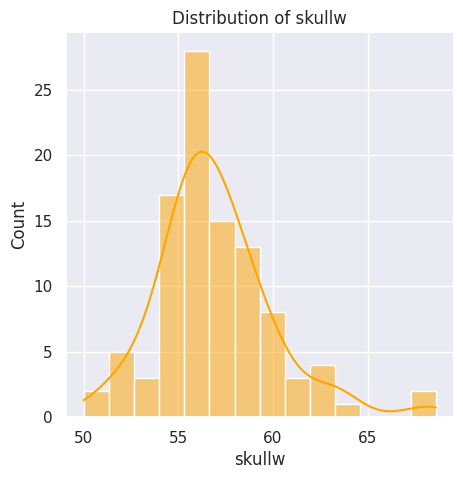

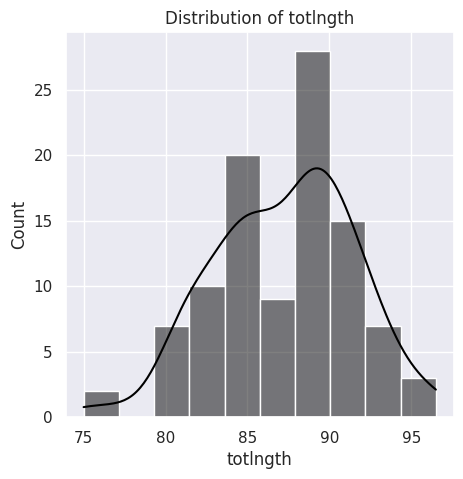

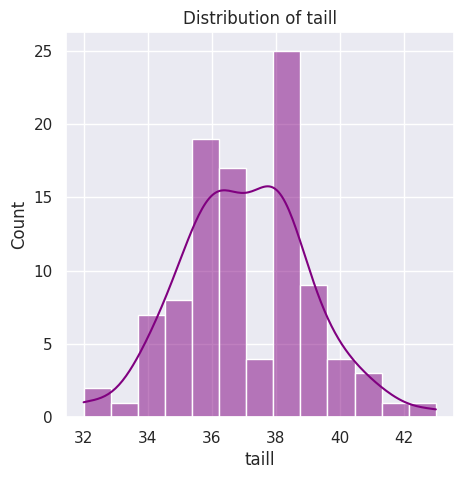

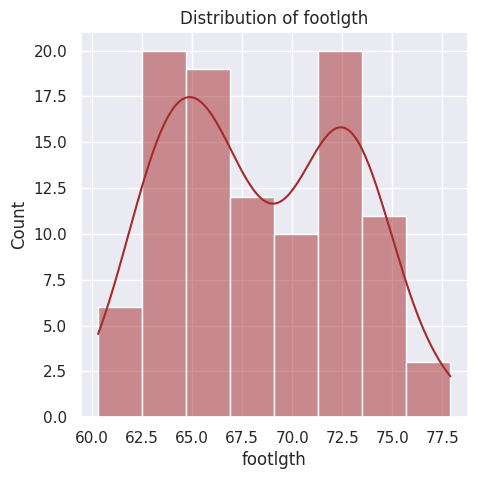

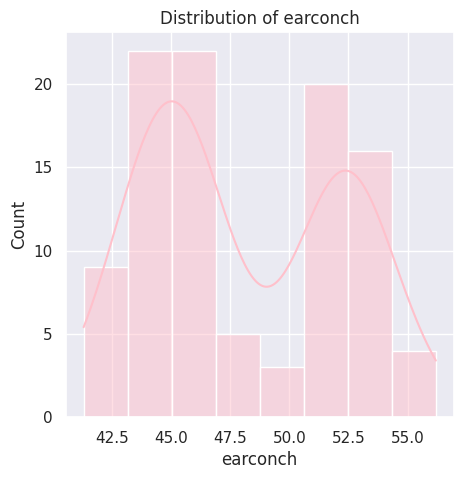

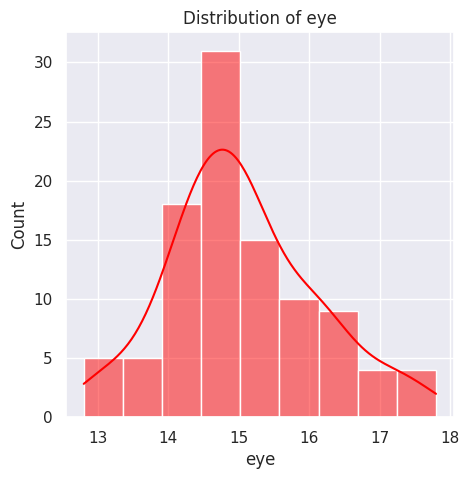

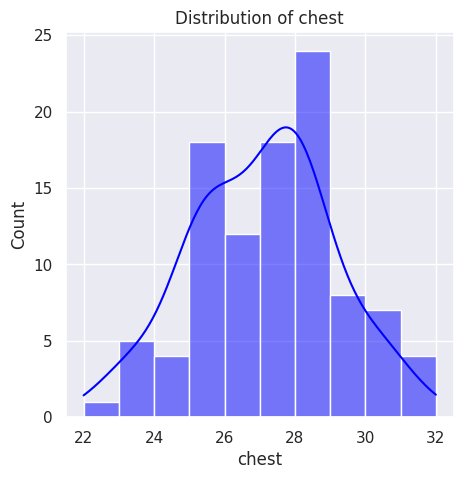

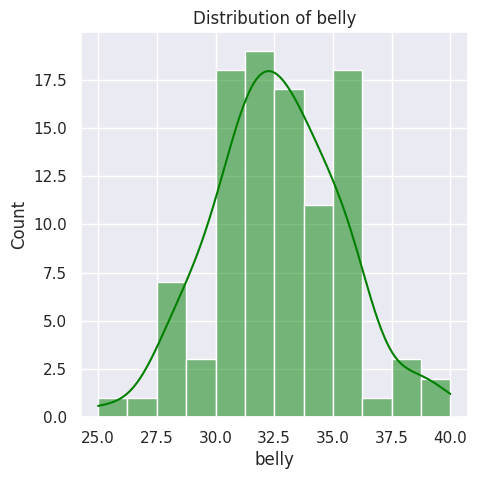

In [10]:
colors=["red","blue", "green","orange","black","purple", "brown","pink","red","blue", "green"]

for i in range(11):
    plt.figure(figsize=(5,5))
    sns.set(style="darkgrid")
    sns.histplot(df, x=df[numerical_columns[i]], kde=True, color=colors[i])
    plt.title(f"Distribution of {numerical_columns[i]}")
    plt.show()

# Agora das colunas categóricas

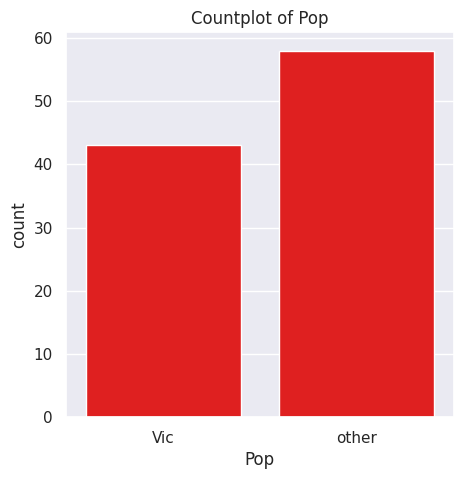

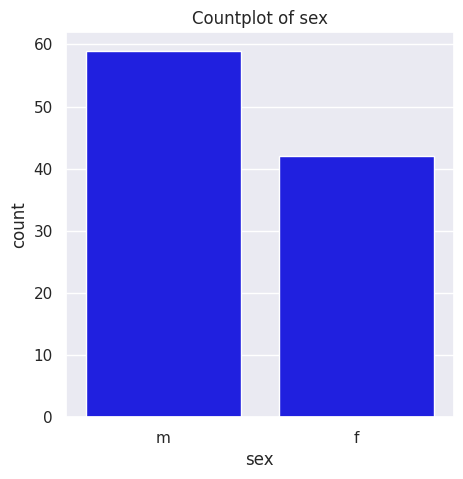

In [11]:
colors=["red","blue"]
for i in range(2):
    plt.figure(figsize=(5,5))
    sns.countplot(df, x=df[categorical_columns[i]],color=colors[i])
    plt.title(f"Countplot of {categorical_columns[i]}")
    plt.show()

# Qual a relacao do tamanho da cabeca com o sexo do gambá?

In [12]:
fig = px.box(df, x="sex", y="hdlngth", points="all", color="sex", title="Headlength vs Sex")
fig.show()

> # Aqui vemos que o gambá macho tem uma cabeça maior em comparação com o gambá fêmea



# Qual a relação de hdlngth com chest, totlngth e skullw?

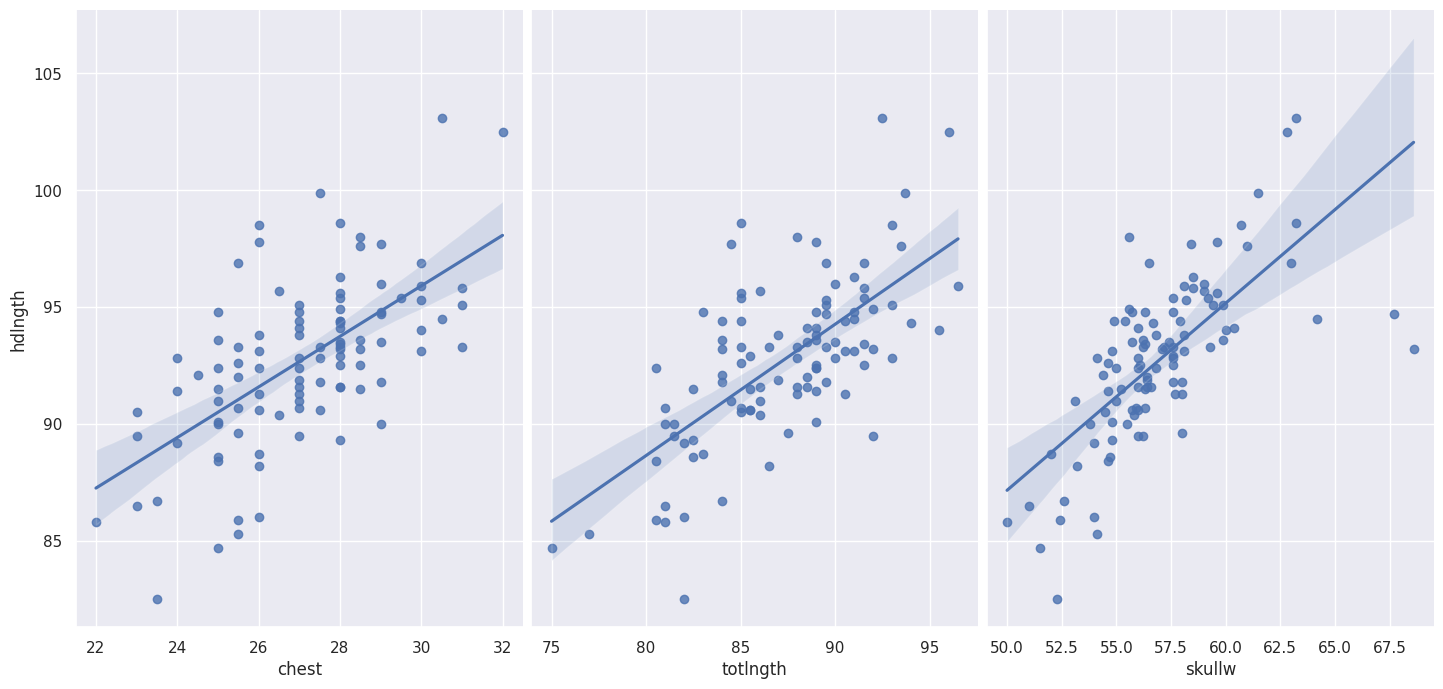

In [13]:
sns.pairplot(df, x_vars=['chest','totlngth','skullw'], y_vars='hdlngth', height=7, aspect=0.7, kind='reg')

In [14]:
df.head()

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
case,,,,,,,,,,,,,
1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


## Codificação de atributos categóricos usando .get_dummies()

One Hot Encoding das variáveis categóricas

In [15]:
df_dummy = pd.get_dummies(data = df, columns = ['Pop', 'sex'])
df_dummy.head()

,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,Pop_Vic,Pop_other,sex_f,sex_m
case,,,,,,,,,,,,,,,
1,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,True,False,False,True
2,1,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,True,False,True,False
3,1,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,True,False,True,False
4,1,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,True,False,True,False
5,1,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,True,False,True,False


In [16]:
atributos = df_dummy.columns

X = df_dummy[atributos]
X = X.drop(['hdlngth'], axis=1)
X.head()

,site,age,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,Pop_Vic,Pop_other,sex_f,sex_m
case,,,,,,,,,,,,,,
1,1,8.0,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,True,False,False,True
2,1,6.0,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,True,False,True,False
3,1,6.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,True,False,True,False
4,1,6.0,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,True,False,True,False
5,1,2.0,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,True,False,True,False


In [17]:
y = df['hdlngth']
y.head()

,hdlngth
case,
1,94.1
2,92.5
3,94.0
4,93.2
5,91.5


## Separa em treino e teste

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(70, 14)
(70,)
(31, 14)
(31,)


## Normalização

In [19]:
normalizer = layers.Normalization()
normalizer.adapt(np.array(X_train))

# Regressão Linear

## Construção da Regressão Linear

In [20]:
model = keras.Sequential([
    normalizer,
    layers.Dense(1)
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (70, 14)                    │              29 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29 (120.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 29 (120.00 B)

## Inserção de otimizador e função de custo

In [21]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='mean_absolute_error')

history = model.fit(X_train, y_train,epochs=350, validation_data=(X_test, y_test))

Epoch 1/350
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step - loss: 92.8375 - val_loss: 92.7322
Epoch 2/350
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 92.2971 - val_loss: 92.4178
Epoch 3/350
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 92.3453 - val_loss: 92.1334
Epoch 4/350
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 91.8566 - val_loss: 91.8427
Epoch 5/350
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 91.6005 - val_loss: 91.5729
Epoch 6/350
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 91.1998 - val_loss: 91.3109
Epoch 7/350
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 91.0102 - val_loss: 91.0304
Epoch 8/350
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 90.7225 - val_loss: 90.7286
Epoch 9/350
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 90.4836 - val_loss: 90.4245
Epoch 10/350
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 90.0059 - val_loss: 90.1042
Epoch 11/350
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 89.9706 - val_loss: 89.7909
Epoch 12/350
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step 

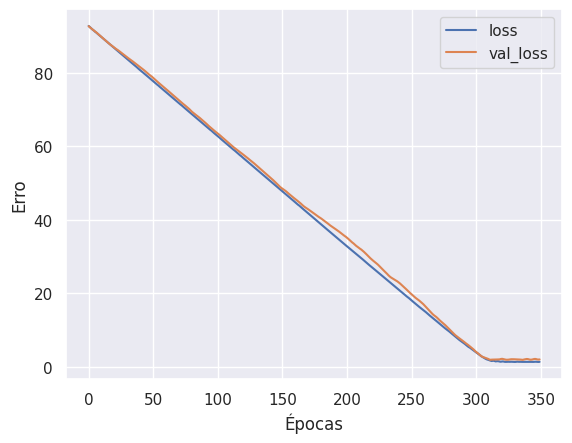

In [22]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Épocas')
    plt.ylabel('Erro')
    plt.legend()
    plt.grid(True)
plot_loss(history)

> Com base no gráfico podemos perceber que há uma estagnação depois de ~300 épocas

In [39]:
y_pred_ln = model.predict(X_test)
print("Regressão Linear RMSE:" , np.sqrt(mean_absolute_error(y_test, y_pred_ln)))
print("Regressão Linear MAPE:" , mean_absolute_percentage_error(y_test, y_pred_ln))
print("Regressão Linear MAE:", mean_absolute_error(y_test, y_pred_ln))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Regressão Linear RMSE: 1.391360819848894
Regressão Linear MAPE: 0.020428590198853222
Regressão Linear MAE: 1.9358849310105863


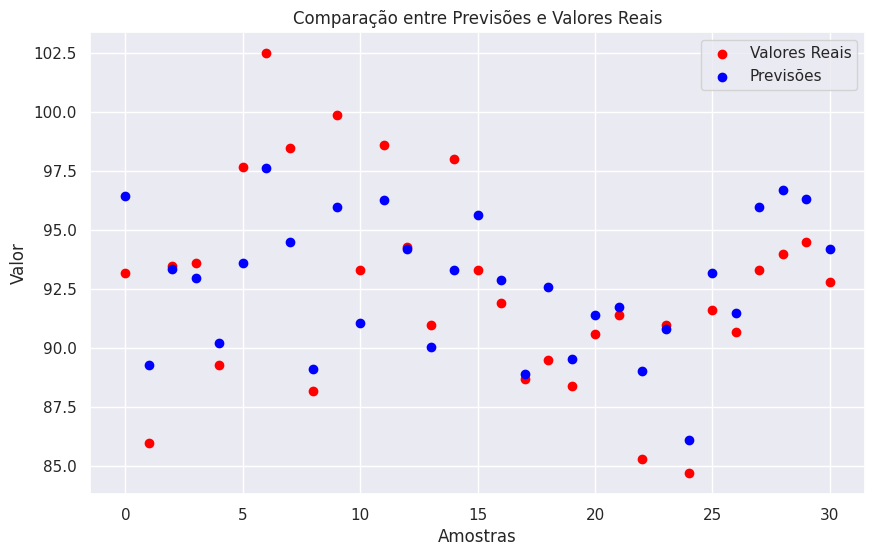

In [24]:
def plot_res(y_test, y_pred):
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(y_test)), y_test, label='Valores Reais', color='red')
    plt.scatter(range(len(y_pred)), y_pred, label='Previsões', color='blue')
    plt.xlabel('Amostras')
    plt.ylabel('Valor')
    plt.title('Comparação entre Previsões e Valores Reais')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_res(y_test, y_pred_ln)

# Árvore de Decisão

In [25]:
model = DecisionTreeRegressor(random_state=1)

model.fit(X_train, y_train)
y_pred_dt = model.predict(X_test)

In [26]:
print("Árvore de Decisão - RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))
print("Árvore de Decisão - MAPE:", mean_absolute_percentage_error(y_test, y_pred_dt))
print("Árvore de Decisão - MAE:", mean_absolute_error(y_test, y_pred_dt))

Árvore de Decisão - RMSE: 3.4731690465346574
Árvore de Decisão - MAPE: 0.030476905246958154
Árvore de Decisão - MAE: 2.8419354838709694


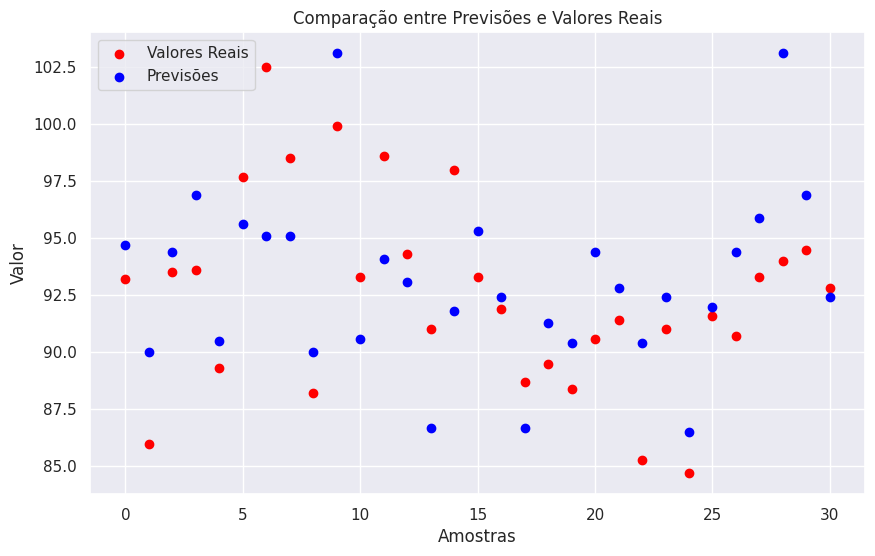

In [27]:
plot_res(y_test, y_pred_dt)

## Rede Neural

## Construção da Rede Neural

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(70, 14)
(70,)
(31, 14)
(31,)


In [29]:
normalizer = layers.Normalization()
normalizer.adapt(np.array(X_train))

In [30]:
model = keras.Sequential([
    layers.Dense(64, activation='relu'),  # Primeira camada oculta
    layers.Dense(32, activation='relu'),  # Segunda camada oculta
    layers.Dense(1)  # Camada de saída
])

model.compile(optimizer='adam', loss='mean_absolute_error')

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step - loss: 91.2620 - val_loss: 80.8221
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 79.2370 - val_loss: 68.9853
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 67.6594 - val_loss: 58.8817
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 57.6322 - val_loss: 49.3735
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 48.0820 - val_loss: 39.3035
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 37.8396 - val_loss: 28.6613
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 27.1891 - val_loss: 18.1909
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 16.6299 - val_loss: 7.7597
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 6.3569 - val_loss: 3.4045
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 3.8624 - val_loss: 7.7718
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 7.8596 - val_loss: 7.5330
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 7.1925 - va

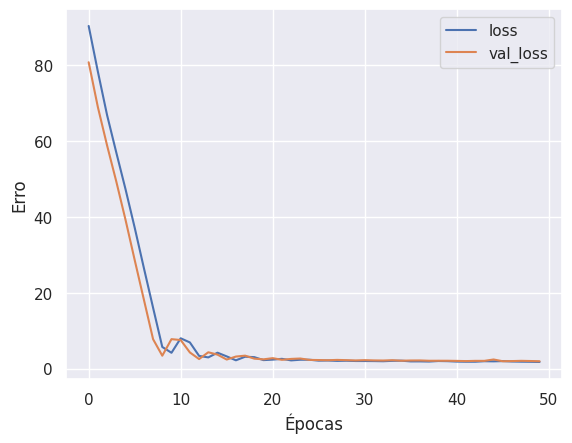

In [31]:
plot_loss(history)

In [32]:
y_pred_nn = model.predict(X_test)
print(y_pred_nn)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
[[93.66156 ]
 [86.51098 ]
 [94.23686 ]
 [93.92138 ]
 [89.68688 ]
 [91.00904 ]
 [99.117775]
 [97.10659 ]
 [87.171585]
 [95.54772 ]
 [90.89858 ]
 [93.18729 ]
 [96.3717  ]
 [88.93018 ]
 [91.83055 ]
 [95.72996 ]
 [91.176544]
 [87.43554 ]
 [92.22596 ]
 [86.08433 ]
 [91.14007 ]
 [91.16527 ]
 [85.08428 ]
 [90.567856]
 [83.430565]
 [91.99916 ]
 [90.26772 ]
 [97.24036 ]
 [98.813805]
 [95.20901 ]
 [92.97618 ]]


In [33]:
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.9359


1.9358845949172974

## Calcular as métricas

In [34]:
print("Rede Neural - RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_nn)))
print("Rede Neural - MAPE:", mean_absolute_percentage_error(y_test, y_pred_nn))
print("Rede Neural - MAE:", mean_absolute_error(y_test, y_pred_nn))

Rede Neural - RMSE: 2.68636429267358
Rede Neural - MSE: 7.216553112951622
Rede Neural - MAE: 1.9358849310105863


## Visualizar a relação entre valores reais e previstos

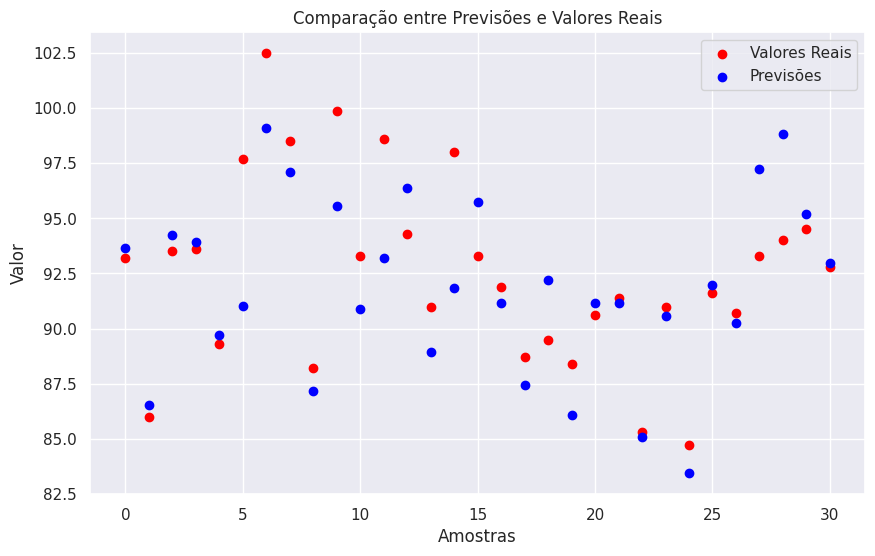

In [35]:
plot_res(y_test, y_pred_nn)

In [42]:
print("Regressão Linear RMSE:" , np.sqrt(mean_absolute_error(y_test, y_pred_ln)))
print("Regressão Linear MAPE:" , mean_absolute_percentage_error(y_test, y_pred_ln))
print("Regressão Linear MAE:", mean_absolute_error(y_test, y_pred_ln))
print("---------------------------------------")
print("Árvore de Decisão - RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))
print("Árvore de Decisão - MAPE:", mean_absolute_percentage_error(y_test, y_pred_dt))
print("Árvore de Decisão - MAE:", mean_absolute_error(y_test, y_pred_dt))
print("---------------------------------------")
print("Rede Neural - RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_nn)))
print("Rede Neural - MAPE:", mean_absolute_percentage_error(y_test, y_pred_nn))
print("Rede Neural - MAE:", mean_absolute_error(y_test, y_pred_nn))

Regressão Linear RMSE: 1.391360819848894
Regressão Linear MAPE: 0.020428590198853222
Regressão Linear MAE: 1.9358849310105863
---------------------------------------
Árvore de Decisão - RMSE: 3.4731690465346574
Árvore de Decisão - MAPE: 0.030476905246958154
Árvore de Decisão - MAE: 2.8419354838709694
---------------------------------------
Rede Neural - RMSE: 2.68636429267358
Rede Neural - MAPE: 0.020428590198853222
Rede Neural - MAE: 1.9358849310105863
